In [193]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
pd.set_option("display.max_columns",None)
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

warnings.filterwarnings("ignore")

In [194]:
#reading the csv file
data=pd.read_csv("airqualitydata.csv")

In [195]:
#displaying the random rows 
data.sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
7743,Chandigarh,2020-04-02,11.20,31.54,1.47,9.80,6.30,34.46,0.39,8.68,19.40,2.94,0.11,0.99,34.0,Good
14618,Hyderabad,2015-02-10,NaN,NaN,3.95,12.77,16.73,NaN,0.29,3.38,39.34,0.38,2.81,0.67,NaN,NaN
1414,Ahmedabad,2018-11-15,83.28,NaN,33.47,97.90,41.93,NaN,33.47,48.93,36.84,3.97,32.20,6.81,688.0,Severe
489,Ahmedabad,2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25639,Patna,2020-04-10,52.72,119.57,43.93,37.04,46.09,12.87,1.44,11.00,31.62,0.64,4.19,0.37,144.0,Moderate


In [196]:
data.shape

(29531, 16)

<h5>The data set contains total 29531 rows and 16 columns.</h1>

In [197]:
#Displaying the all the columns of the data set
print("Different features or column names")
for i in data.columns:
    print(i)

Different features or column names
City
Date
PM2.5
PM10
NO
NO2
NOx
NH3
CO
SO2
O3
Benzene
Toluene
Xylene
AQI
AQI_Bucket


<h4>Description of the Features</h4>
<h5>1).AQI</h5>
<p>The Air Quality Index (AQI) is a number that measures how clean or polluted the air is. It's used to warn people about the health risks of breathing polluted air.<br>Greater the value of AQI ,higher the pollution rate.</p>
<h5>2).PM2.5</h5>
<p>PM2.5, or particulate matter 2.5, is a term for tiny particles or droplets in the air that are 2.5 microns or less in width.<br>The largest PM2.5 particles are about 30 times smaller than a human hair.<br>PM2.5 can damage lung cells.</p>
<h5>3).PM10</h5>
<p>PM10 is a measure of the amount of inhalable particles in the air that are 10 micrometers or less in diameter.<br>PM10 can cause serious health effects, including heart and lung disease.</p>
<h5>4).NO</h5>
<p>NO(nitrogen oxide) contributes to a higher Air Quality Index (AQI) because it is a pollutant that can react with other chemicals in the air to form ozone and particulate matter.<br>Breathing air with high NO levels can irritate airways, particularly for individuals with respiratory conditions like asthma.</p>
<h5>5).NO2</h5>
<p>NO2 plays a crucial role in the photochemical process that creates ground-level ozone, another significant air pollutant which further contributes to a poor AQI. <br>NO2 is a major irritant to the airways, causing coughing, wheezing, and breathing difficulties, especially for people with asthma or other respiratory conditions.</p>
<h5>6).NOx</h5>
<p>NOx reacts with volatile organic compounds (VOCs) in the presence of sunlight to produce ground-level ozone, a key factor in elevated AQ</p>
<h5>7).NH3</h5>
<p>Ammonia reacts with acidic pollutants in the atmosphere, forming fine particulate matter (PM2.5) which can penetrate deep into the lungs and cause respiratory issues. </p>
<h5>8).CO</h5>
<p>Inhaling high levels of CO can reduce the amount of oxygen carried by the blood, leading to health issues</p>
<h5>9).SO2</h5>
<p>SO2, whether of volcanic or anthropogenic origin, is a toxic gas that, when present in high concentrations in the environment, alters air quality and has a significant impact on the respiratory and cardiovascular health of the population, even at great distances from the source of emissions.</p>
<h5>10).O3</h5>
<p>While ozone in the stratosphere protects us from harmful UV rays, ground-level ozone is considered a pollutant. </p>
<h5>11).Benzene</h5>
<p>Benzene is a known carcinogen, meaning exposure can increase the risk of cancer, particularly leukemia, even at low levels. </p>
<h5>12).Toluene</h5>
<p>Exposure to toluene can cause irritation to the eyes, nose, and throat, along with symptoms like headaches, dizziness, and nausea, especially at high concentrations. </p>
<h5>13).Xylene</h5>
<p>Inhaling xylene can cause eye, nose, and throat irritation, even at relatively low concentrations, impacting health directly and contributing to a lower AQI. </p>

In [198]:
#columns of the data set are 
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [199]:
#checking the total null values
data.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [200]:
#percentage of the missing values 
percentage=(data.isna().mean()*100).sort_values(ascending=False)

In [201]:
percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

<Axes: >

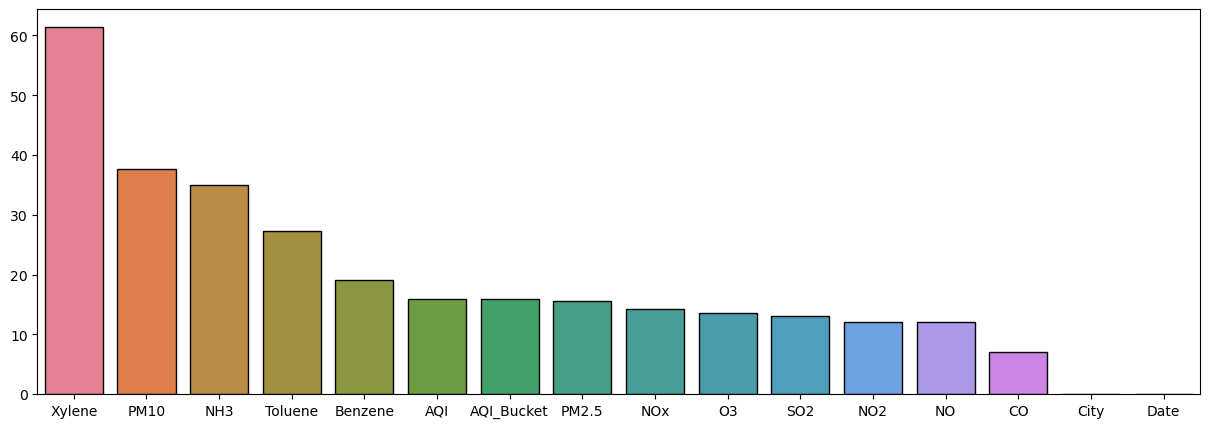

In [202]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("husl", len(percentage))
sns.barplot(data=percentage,palette=colors,edgecolor="black")

In [203]:
#checking the unique values in the columns city
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [204]:
#Total number of  unique cities
data.City.nunique()  

26

In [205]:
#counts of each cities in the data set
data['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [206]:
data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [207]:
data['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [208]:
##Underastanding the Statistical description of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [209]:

data[data['AQI'].isna()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29374,Visakhapatnam,2020-01-27,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,2020-02-22,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,2020-03-02,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN
29463,Visakhapatnam,2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
#dropping the rows that has null values in "AQI" column
data=data.dropna(subset=['AQI'])

In [211]:
#data.shape

In [212]:
#Checking whether is there any duplicate rows exist or not
data.duplicated().sum()

0

In [213]:
data.City.nunique()

26

In [214]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

<h3>EDA(Exploratory Data Analysis)</h3>

<h3>Histogram</h3>

In [215]:
#plotting histogram
def plot_hist(data):
    num_cols=data.select_dtypes(exclude='object')
    for feature in num_cols:
        sns.histplot(x=data[feature],color='orange',bins=30,edgecolor='black')
        plt.show()

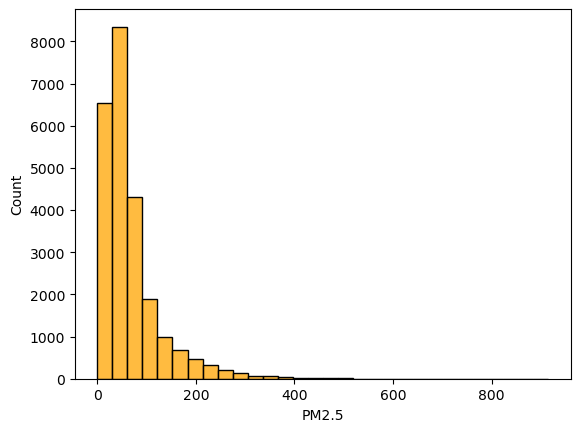

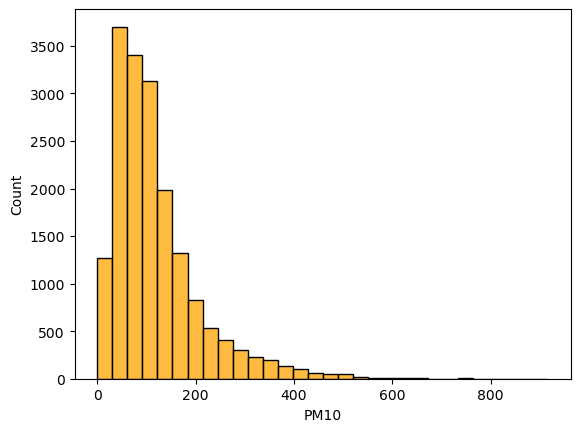

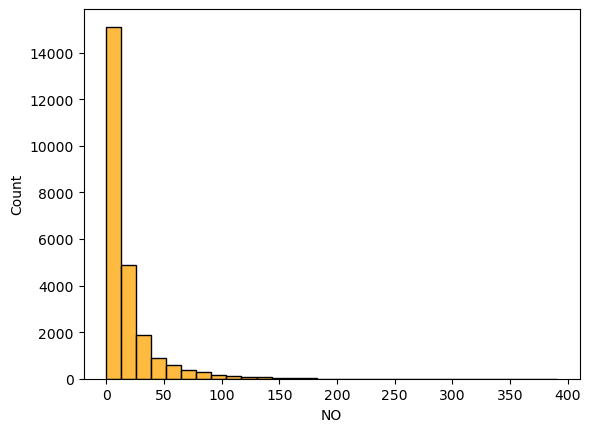

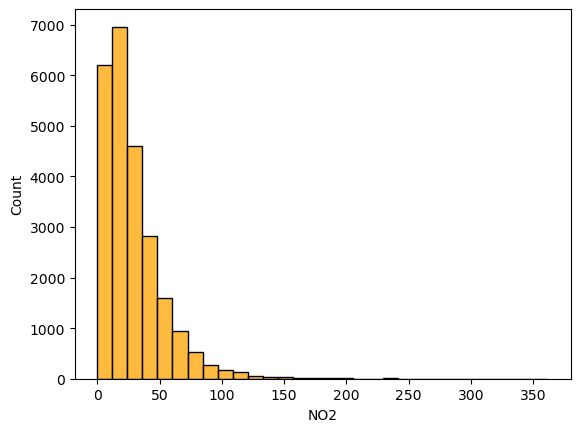

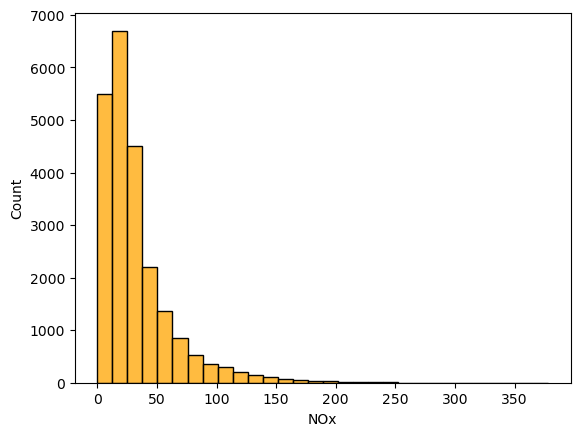

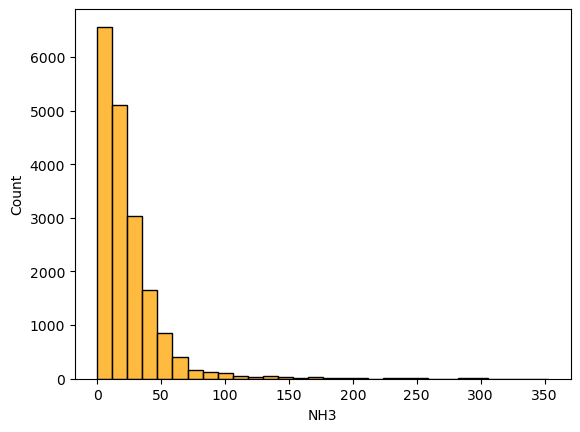

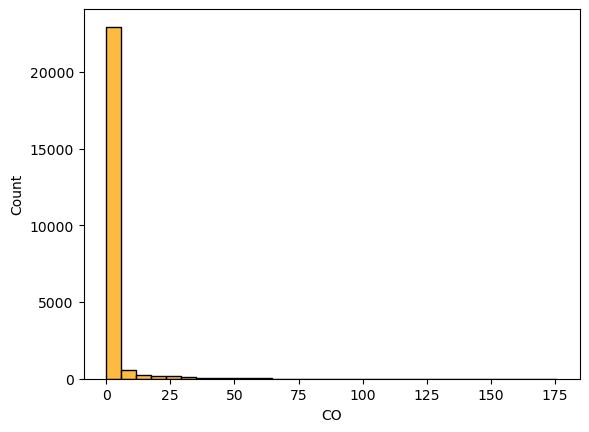

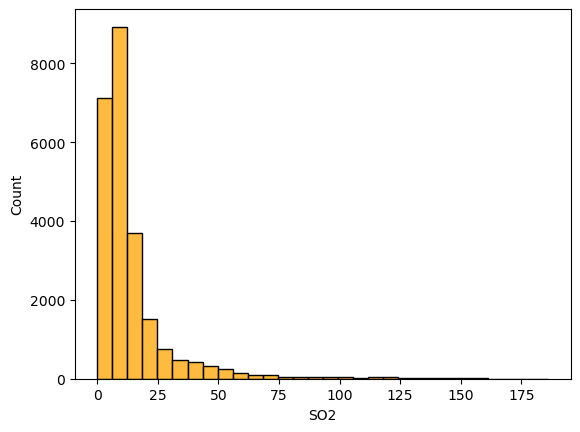

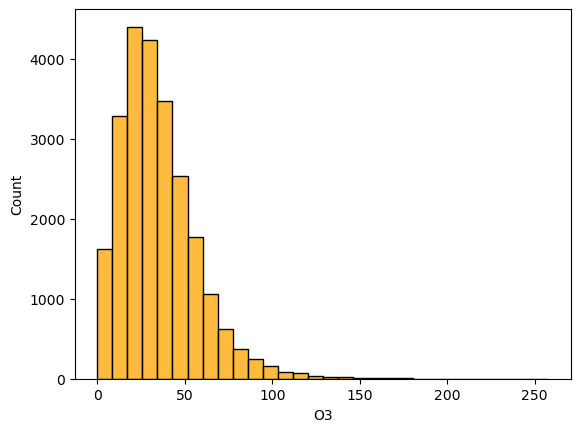

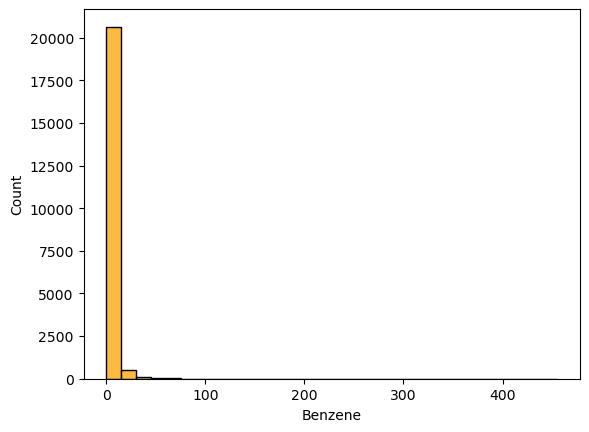

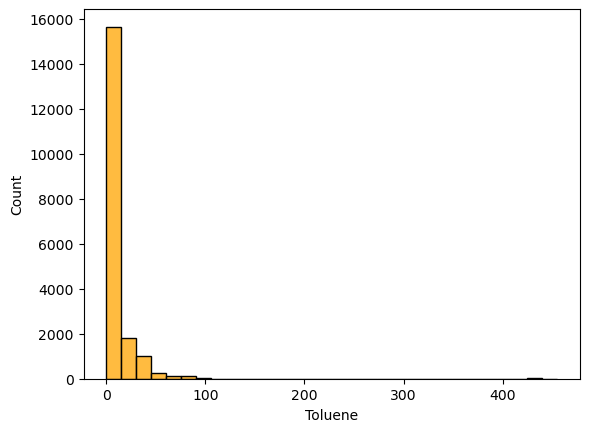

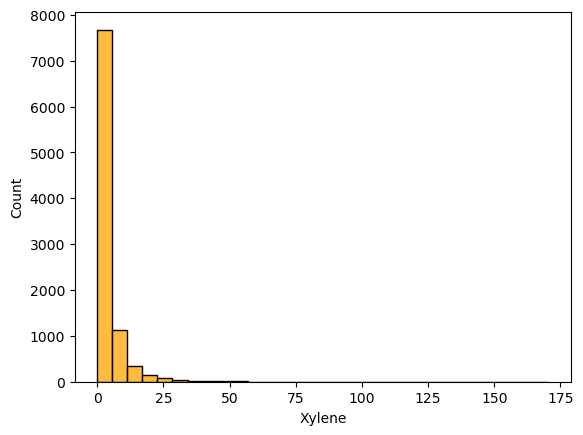

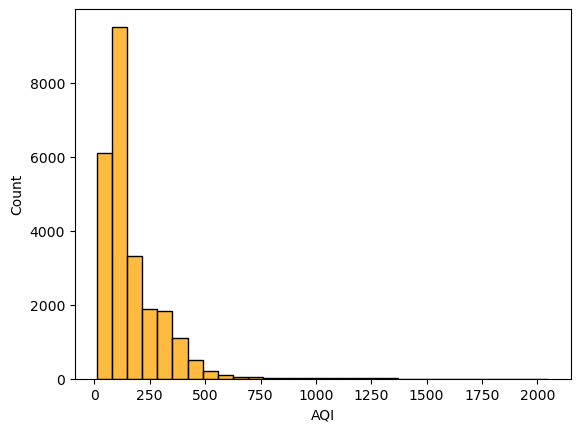

In [216]:
plot_hist(data)

<Axes: xlabel='AQI', ylabel='Count'>

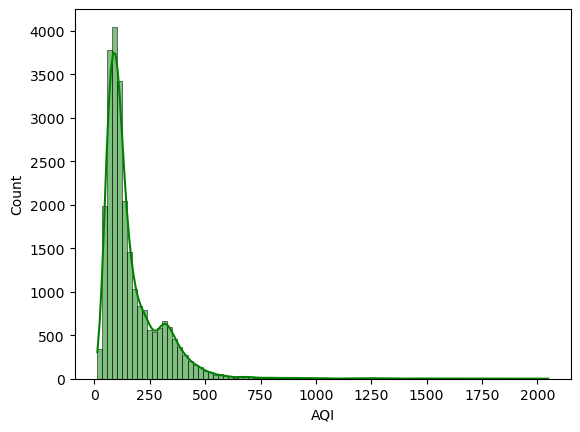

In [217]:
#Distribution of the AQI 
sns.histplot(x=data['AQI'],bins=90,color='green',kde=True,edgecolor='black')

In [218]:
data['City'].value_counts()

City
Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: count, dtype: int64

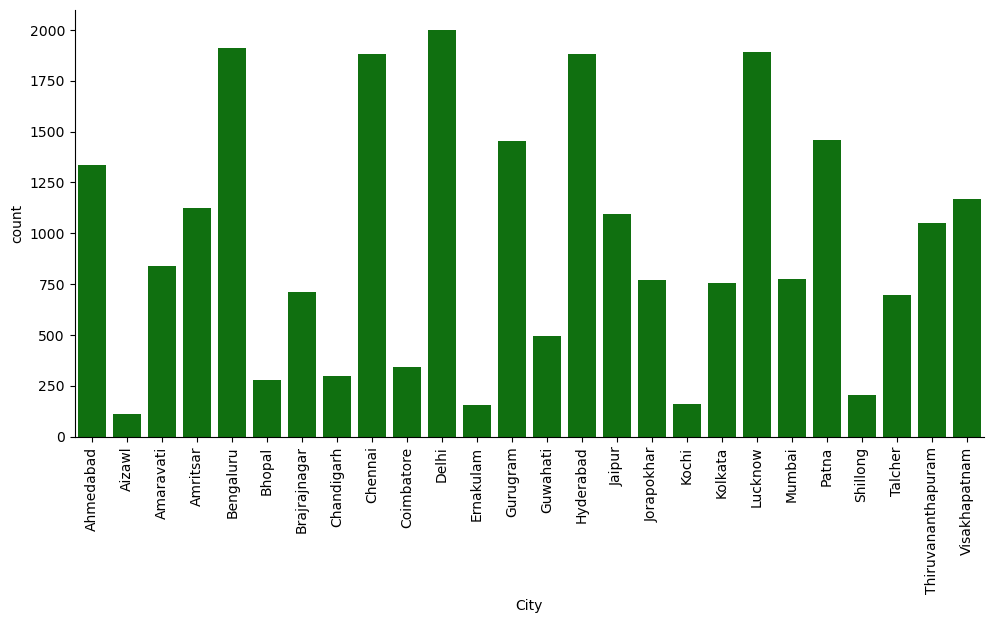

In [219]:
#count of each cities in the data set
graph = sns.catplot(x="City", kind='count',color='g', data=data, height=5, aspect=2)
graph.set_xticklabels(rotation=90)

In [220]:
def Outliersinfo(data):
    #provides the information of outliers present in each columns
    num_cols=data.select_dtypes(exclude='object')
    for feature in num_cols:
        outlier_summary={}
        Q1=data[feature].quantile(0.25)
        Q3=data[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        outliers=data[(data[feature]<lower_bound)|(data[feature]>upper_bound)]
        outlier_summary[feature]=len(outliers)
        print(f"{feature}: {len(outliers)} outliers")

       

In [221]:
Outliersinfo(data)

PM2.5: 1911 outliers
PM10: 1023 outliers
NO: 2342 outliers
NO2: 1072 outliers
NOx: 1652 outliers
NH3: 958 outliers
CO: 2289 outliers
SO2: 2409 outliers
O3: 664 outliers
Benzene: 1458 outliers
Toluene: 2123 outliers
Xylene: 859 outliers
AQI: 1358 outliers


In [222]:
#Visualising the Outliers with respect to each cities
def Plot(data,feature):
    x=sns.catplot(x='City',y=feature,kind='box',data=data,height=5,aspect=3)
    x.set_xticklabels(rotation=90)
    plt.show()

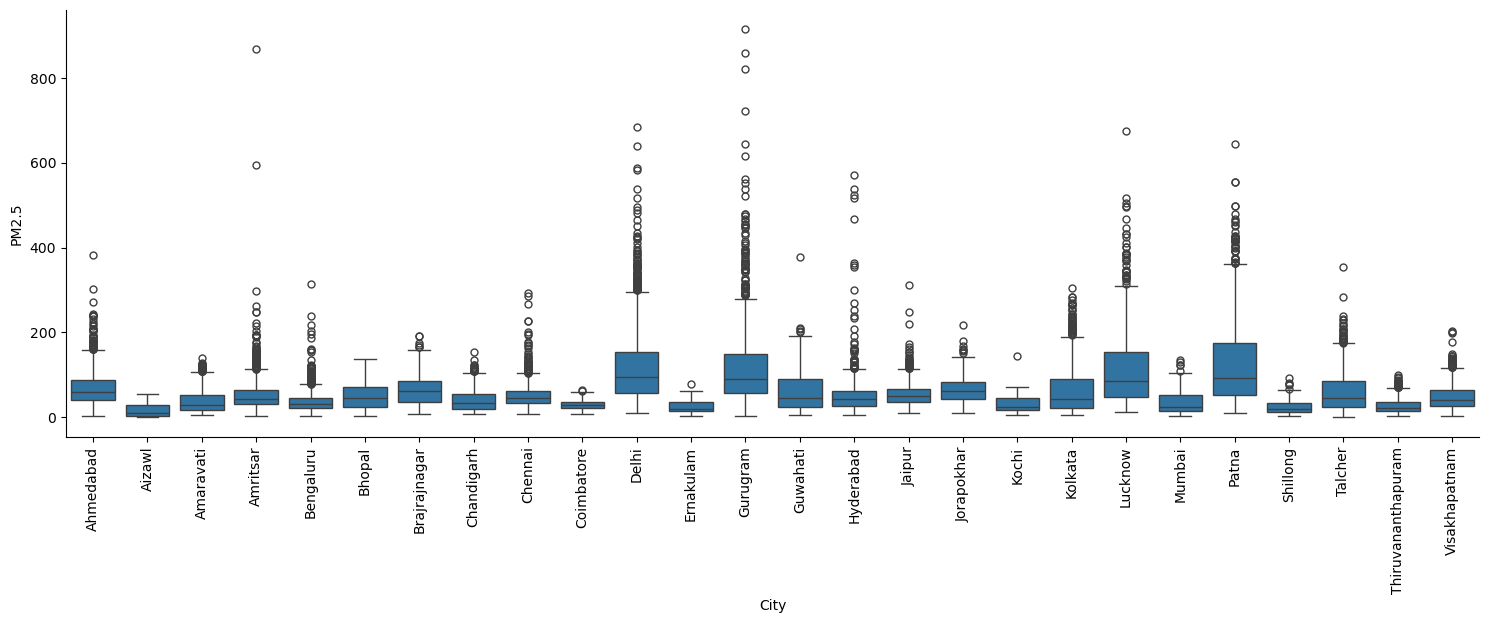

In [223]:
Plot(data,'PM2.5')

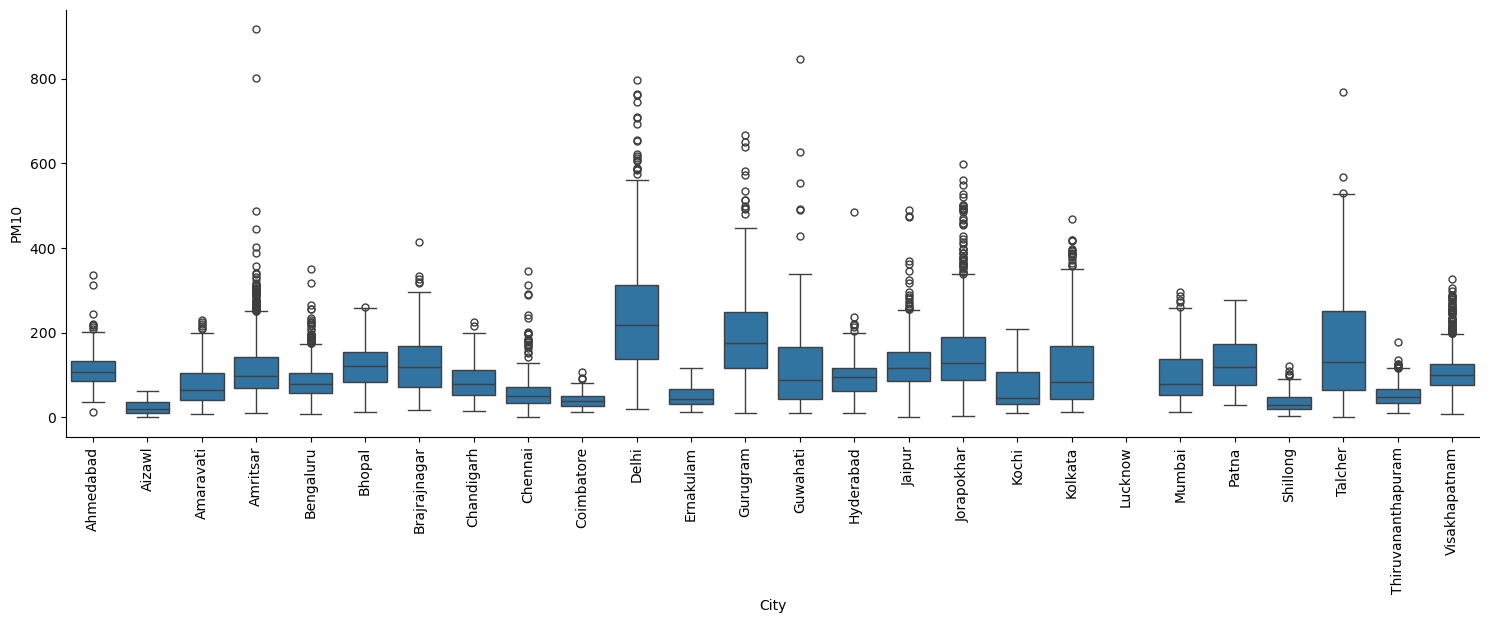

In [224]:
Plot(data,'PM10')

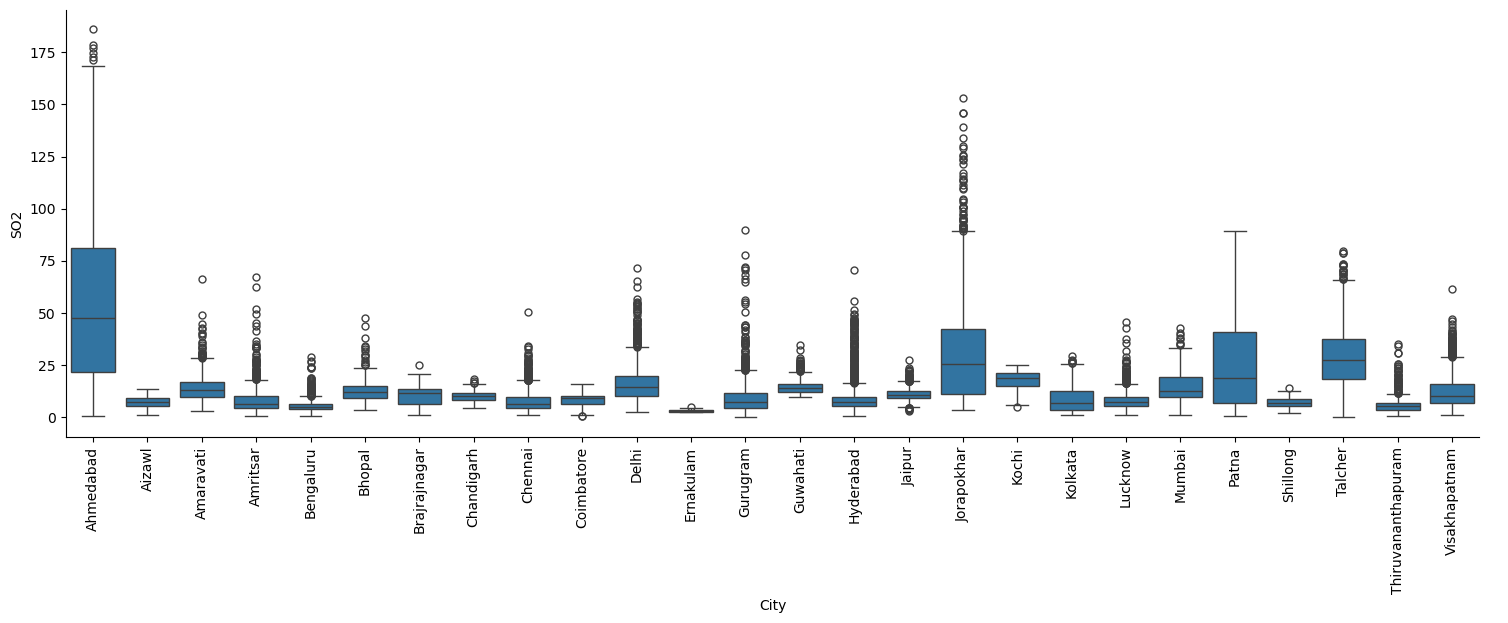

In [225]:
Plot(data,'SO2')

In [226]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [227]:
#plotting the Boxplot 


In [228]:
#filling the missing values with their mean values
num_cols=data.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy="mean")
data[num_cols] = num_imputer.fit_transform(data[num_cols])

In [229]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [230]:
#plotting the boxplot
def Boxplot(data):
    numeric_data = data.select_dtypes(include=["number"])
    melted_data = numeric_data.melt(var_name="Features", value_name="Values")
    sns.catplot(
        data=melted_data,
        x="Features",
        y="Values",
        kind="box",
        height=6,
        aspect=2
    )
    plt.title("Box Plot of Numeric Features")
    plt.show()

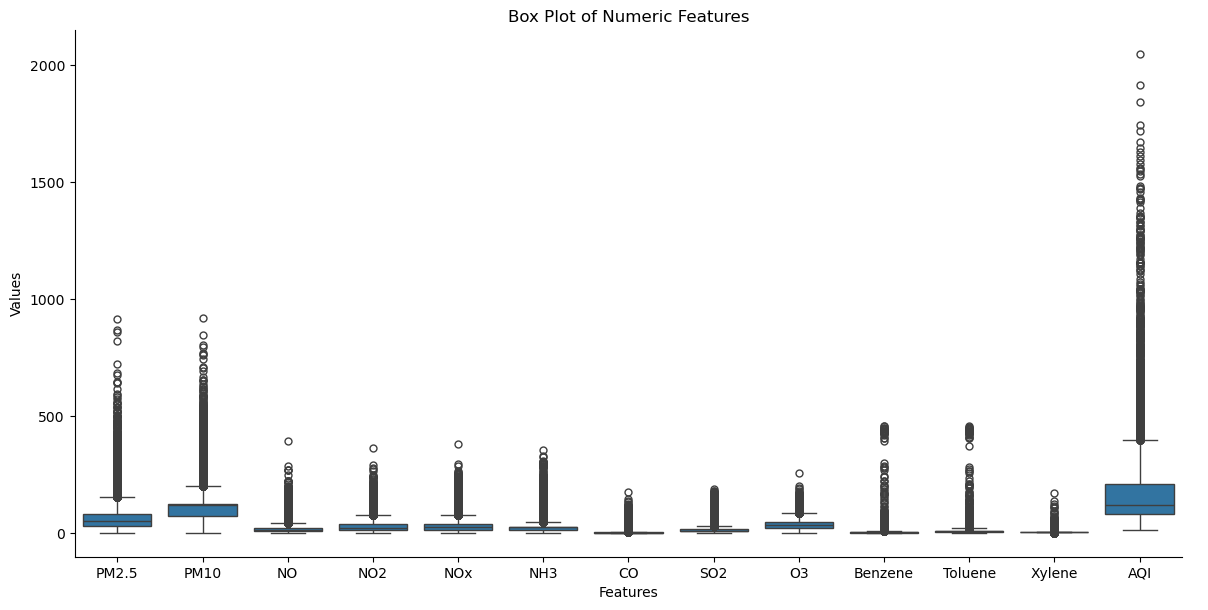

In [231]:
Boxplot(data)

In [232]:
data.shape

(24850, 16)

In [233]:
def handleoutlier(df):
    for feature in df.select_dtypes(include=['number']).columns:
        Q1=data[feature].quantile(0.25)
        Q3=data[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df[feature]=df[feature].apply(lambda x:Q1 if x<lower_bound else(Q3 if x> upper_bound else x))
    return df

In [234]:
data=handleoutlier(data)

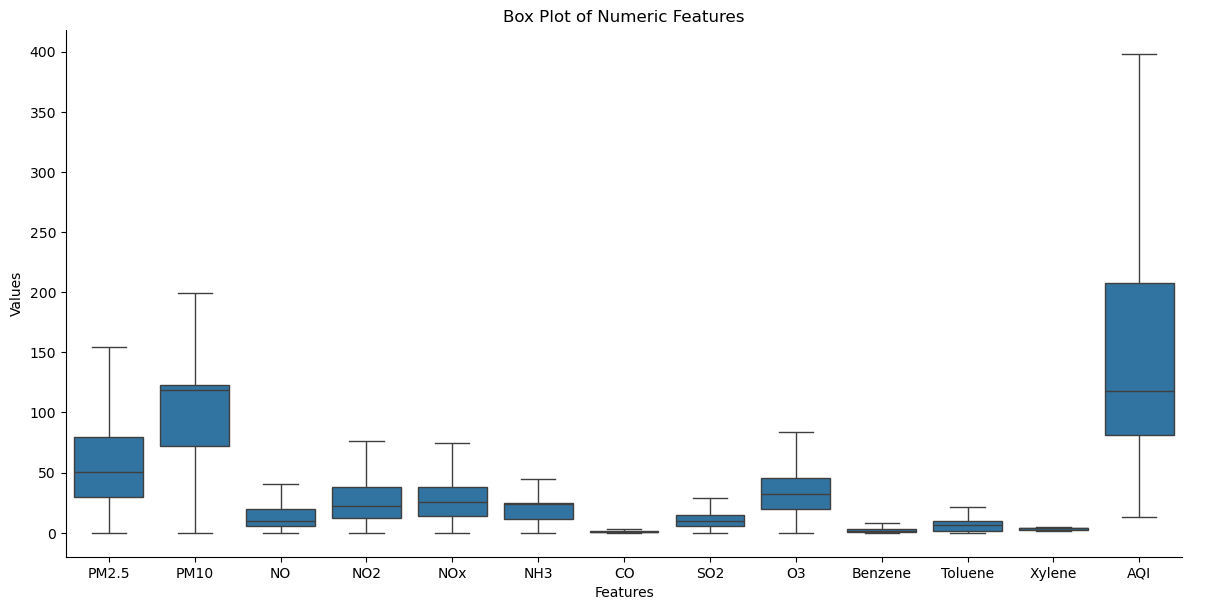

In [235]:
Boxplot(data)

In [236]:
data.shape

(24850, 16)

<Axes: xlabel='AQI', ylabel='Count'>

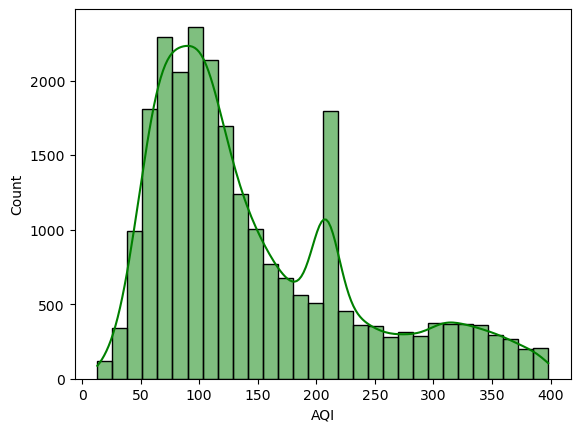

In [237]:
sns.histplot(x=data['AQI'],bins=30,color='green',kde=True,edgecolor='black') #after removing the outliers the skewness of the AQI is some how reduced 

In [238]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [239]:
#the column AQI_Bucket is just tells whether class of the City whether AQI is good or poor based on the value of AQI
#Also dropping the columns City ,Date 
data.drop(columns=['AQI_Bucket','City','Date'],inplace=True,axis=1)

In [240]:
#Understanding the relation ship between the features
corr_mat=data.corr()
corr_mat

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.623424,0.339863,0.391683,0.379606,0.300151,0.316374,0.242684,0.213675,0.153136,0.149201,0.029313,0.763255
PM10,0.623424,1.000000,0.325088,0.384984,0.346613,0.340739,0.245497,0.238446,0.210236,0.140043,0.134399,0.031047,0.553369
NO,0.339863,0.325088,1.000000,0.435698,0.662857,0.244737,0.289184,0.314285,-0.047199,0.185578,0.179097,0.020165,0.384852
NO2,0.391683,0.384984,0.435698,1.000000,0.540363,0.367119,0.191182,0.237106,0.283751,0.220273,0.179215,-0.056793,0.408239
NOx,0.379606,0.346613,0.662857,0.540363,1.000000,0.212236,0.258869,0.289904,0.030249,0.211900,0.221515,0.007459,0.399600
NH3,0.300151,0.340739,0.244737,0.367119,0.212236,1.000000,0.171027,0.083095,0.162704,-0.027547,-0.037359,0.007073,0.325710
CO,0.316374,0.245497,0.289184,0.191182,0.258869,0.171027,1.000000,0.195988,0.050058,0.128523,0.179194,0.074448,0.437319
SO2,0.242684,0.238446,0.314285,0.237106,0.289904,0.083095,0.195988,1.000000,0.156255,0.160289,0.243246,-0.027300,0.283802
O3,0.213675,0.210236,-0.047199,0.283751,0.030249,0.162704,0.050058,0.156255,1.000000,0.083885,0.105680,-0.014148,0.193330
Benzene,0.153136,0.140043,0.185578,0.220273,0.211900,-0.027547,0.128523,0.160289,0.083885,1.000000,0.533385,0.009649,0.168620


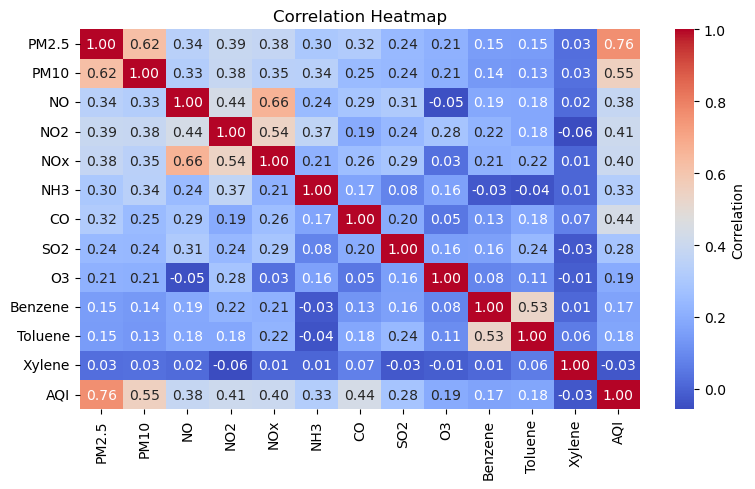

In [241]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [242]:
X=data.drop(columns=['AQI'],axis=1)
y=data['AQI']

In [243]:
scaler=StandardScaler()
X1=scaler.fit_transform(X)
X1=pd.DataFrame(X1,columns=X.columns)
X1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294501
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695136
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733


In [244]:
#From the above correlation matrix we can observe that PM2.5 AND PM10 are highly correlated also NO with NOX 

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=42)

In [246]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(),
    XGBRegressor(objective='reg:squarederror'),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

In [247]:
model_names = []
mae_Accuracy = []
mse_Accuracy = []
r2_Accuracy_train = []
r2_Accuracy_test = []
for algo in models:
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_test_pred = algo.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Append the results
    model_names.append(algo.__class__.__name__)
    mae_Accuracy.append(mae)
    mse_Accuracy.append(mse)
    r2_Accuracy_train.append(r2_train)
    r2_Accuracy_test.append(r2_test)


In [248]:
model_df = pd.DataFrame({
    'Model': model_names,
    'mae_Accuracy': mae_Accuracy,
    'mse_Accuracy': mse_Accuracy,
    'r2_Accuracy_Train': r2_Accuracy_train,
    'r2_Accuracy_Test': r2_Accuracy_test,
})


In [249]:
model_df

,Model,mae_Accuracy,mse_Accuracy,r2_Accuracy_Train,r2_Accuracy_Test
0,LinearRegression,35.345770,2565.675196,0.650261,0.656192
1,Ridge,35.345742,2565.667948,0.650261,0.656193
2,Lasso,35.204321,2569.010632,0.649625,0.655745
3,DecisionTreeRegressor,29.458367,2349.145475,0.999372,0.685208
4,XGBRegressor,22.493643,1219.157818,0.937509,0.836629
5,RandomForestRegressor,21.552210,1158.785803,0.977629,0.844719
6,GradientBoostingRegressor,24.596626,1314.981285,0.830494,0.823789


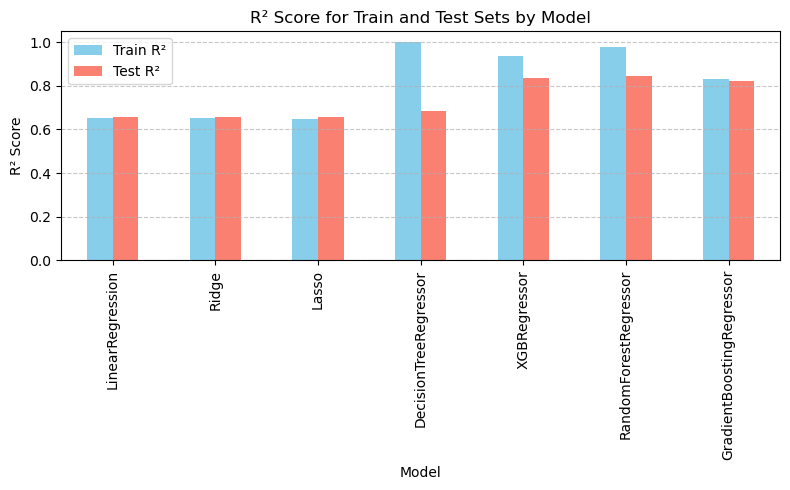

In [250]:
model_df.plot(
    x='Model',
    y=['r2_Accuracy_Train', 'r2_Accuracy_Test'],
    kind='bar',
    figsize=(8, 5),
    color=['skyblue', 'salmon']
)

plt.title('R² Score for Train and Test Sets by Model')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.legend(['Train R²', 'Test R²'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [251]:
##from this what we can conclude is Decision tree is proned to overfitting and also XGB and Random forest are slightly proned toward overfitting but gradient boosting explains the variance quite well on both train and test .